In [2]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install XGBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 6.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import ADASYN
import xgboost as xgb
from sklearn.metrics import cohen_kappa_score


# Train/Test

In [2]:
train_data=pd.read_csv("trainschybou.csv")
test_data=pd.read_csv("test_data.csv")

In [3]:
train_data=train_data.drop("I am currently employed at least part-time",axis=1)

In [4]:
test_data=test_data.drop("I am currently employed at least part-time",axis=1)

In [5]:
columns_order = train_data.columns.tolist()
test_data = test_data[columns_order]

In [6]:
X_train = train_data.drop('Unemployed', axis=1)
y_train = train_data['Unemployed']
X_test = test_data.drop('Unemployed', axis=1)
y_test = test_data['Unemployed']

In [7]:
train_data["Unemployed"].value_counts()

0    171
1     62
Name: Unemployed, dtype: int64

In [8]:
test_data["Unemployed"].value_counts()

0    77
1    24
Name: Unemployed, dtype: int64

# Decision Tree

In [90]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=35, min_samples_split=14, min_samples_leaf=6,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        77
           1       0.57      0.54      0.55        24

    accuracy                           0.79       101
   macro avg       0.71      0.71      0.71       101
weighted avg       0.79      0.79      0.79       101



In [91]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Decision tree+SMOTE

In [92]:
smote = SMOTE(random_state=42, k_neighbors=35, sampling_strategy='minority')
X_resampled_train, y_resampled_train = smote.fit_resample(X_train, y_train)
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=46, min_samples_split=23, min_samples_leaf=13,random_state=42)
model1.fit(X_resampled_train, y_resampled_train)
y_pred1 = model1.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred1))
kappa = cohen_kappa_score(y_test, y_pred)

print("Kappa:", kappa)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        77
           1       0.56      0.75      0.64        24

    accuracy                           0.80       101
   macro avg       0.74      0.78      0.75       101
weighted avg       0.83      0.80      0.81       101

Kappa: 0.4177875377436179


In [93]:
y_pred1 = model1.predict(X_test)
conf_matrix1 = confusion_matrix(y_test, y_pred1)
true_positives = conf_matrix1[1, 1]
false_negatives = conf_matrix1[1, 0]

sensitivity = true_positives / (true_positives + false_negatives)
print("Sensitivity (True Positive Rate):", sensitivity)

Sensitivity (True Positive Rate): 0.75


In [94]:
y_pred_proba1 = model1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba1)
roc_auc = auc(fpr, tpr)
roc_auc

0.7962662337662337

# Decision tree+ADASYN

In [95]:
adasyn = ADASYN(random_state=42, n_neighbors=14, sampling_strategy='minority')
X_resampled_train, y_resampled_train = adasyn.fit_resample(X_train, y_train)
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=28, min_samples_leaf=11,random_state=42)
model2.fit(X_resampled_train, y_resampled_train)
y_pred2 = model2.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred2))
kappa = cohen_kappa_score(y_test, y_pred2)

print("Kappa:", kappa)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87        77
           1       0.57      0.67      0.62        24

    accuracy                           0.80       101
   macro avg       0.73      0.76      0.74       101
weighted avg       0.81      0.80      0.81       101

Kappa: 0.48311156601842375


In [96]:
y_pred2 = model2.predict(X_test)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
true_positives = conf_matrix2[1, 1]
false_negatives = conf_matrix2[1, 0]

sensitivity = true_positives / (true_positives + false_negatives)
print("Sensitivity (True Positive Rate):", sensitivity)

Sensitivity (True Positive Rate): 0.6666666666666666


In [97]:
y_pred_proba2 = model2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba2)
roc_auc = auc(fpr, tpr)
roc_auc

0.7729978354978355

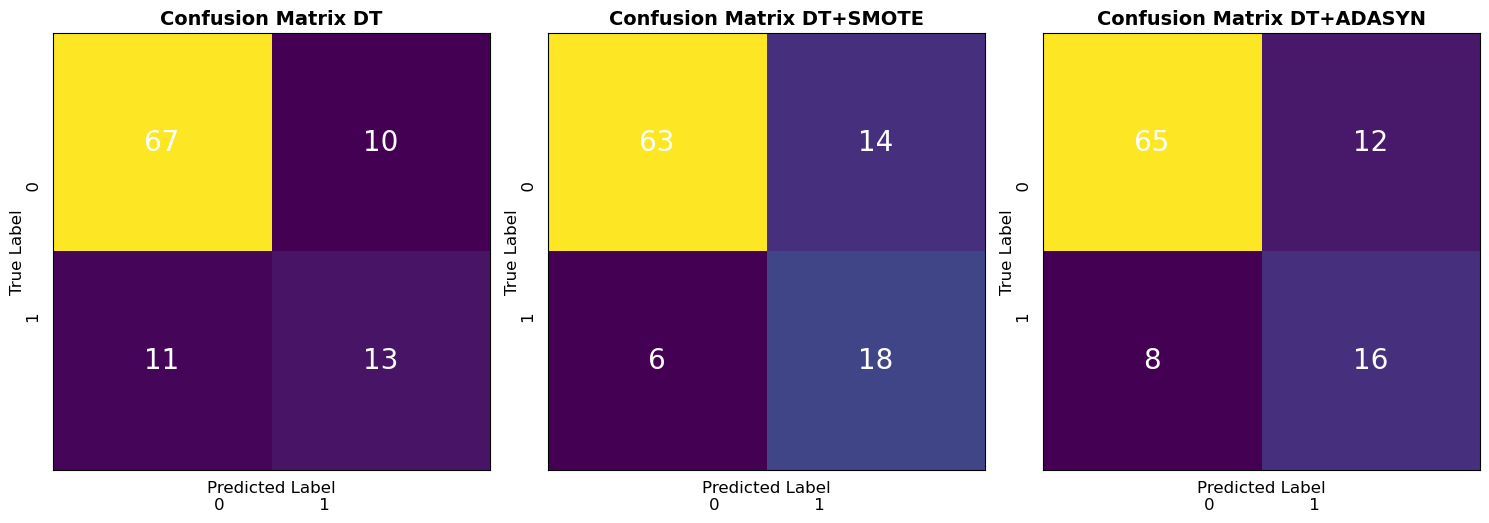

In [98]:
conf_matrices = [conf_matrix, conf_matrix1, conf_matrix2]
dark_palette = 'viridis'

plt.figure(figsize=(15, 5)) 
titles = ["Confusion Matrix DT", "Confusion Matrix DT+SMOTE", "Confusion Matrix DT+ADASYN"]
for i, (conf_matrix, title) in enumerate(zip(conf_matrices, titles), start=1):
    plt.subplot(1, len(conf_matrices), i)
    plt.imshow(conf_matrix, cmap=dark_palette, interpolation='nearest')

    for x in range(conf_matrix.shape[0]):
        for y in range(conf_matrix.shape[1]):
            plt.text(y, x, f'{conf_matrix[x, y]}', ha='center', va='center', color='white', fontsize=20)

    plt.title(title, fontsize=14, fontweight='bold')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.xlabel('Predicted Label\n0                  1', fontsize=12)
    plt.ylabel('True Label\n1                       0', fontsize=12)


plt.tight_layout()  
plt.show()


# Random forest

In [99]:
rf_classifier_first_model = RandomForestClassifier(criterion="gini",n_estimators=44, random_state=42,max_depth=27,min_samples_split=8,min_samples_leaf=1)
rf_classifier_first_model.fit(X_train, y_train)
y_pred = rf_classifier_first_model.predict(X_test)
print("Classification Report for the first model:")
print(classification_report(y_test, y_pred))

Classification Report for the first model:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        77
           1       0.85      0.46      0.59        24

    accuracy                           0.85       101
   macro avg       0.85      0.72      0.75       101
weighted avg       0.85      0.85      0.83       101



In [100]:
cm = confusion_matrix(y_test, y_pred)

# Random forest+SMOTE

In [101]:
smote = SMOTE(random_state=42, k_neighbors=32, sampling_strategy='minority')
X_resampled_train, y_resampled_train = smote.fit_resample(X_train, y_train)
model_RF_second_model = RandomForestClassifier(criterion="gini",n_estimators=27,max_depth=84,min_samples_split=17, min_samples_leaf=2,random_state=42)
model_RF_second_model.fit(X_resampled_train, y_resampled_train)

y_pred_RF_second_model = model_RF_second_model.predict(X_test)

print("Classification Report for the second model:")
print(classification_report(y_test, y_pred_RF_second_model))
kappa = cohen_kappa_score(y_test, y_pred_RF_second_model)

print("Kappa:", kappa)

Classification Report for the second model:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        77
           1       0.54      0.62      0.58        24

    accuracy                           0.78       101
   macro avg       0.71      0.73      0.72       101
weighted avg       0.80      0.78      0.79       101

Kappa: 0.43142272262026615


In [102]:
cm1 = confusion_matrix(y_test, y_pred_RF_second_model)
true_positives = cm1[1, 1]
false_negatives = cm1[1, 0]

sensitivity = true_positives / (true_positives + false_negatives)
print("Sensitivity (True Positive Rate):", sensitivity)

Sensitivity (True Positive Rate): 0.625


In [103]:
y_prob_RF_second_model = model_RF_second_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_RF_second_model)
auc_score = roc_auc_score(y_test, y_prob_RF_second_model)
auc_score

0.7775974025974026

# RF+ADASYN

In [104]:
adasyn = ADASYN(random_state=42, n_neighbors=20,sampling_strategy='minority')
X_resampled_train, y_resampled_train = adasyn.fit_resample(X_train, y_train)
model_RF_adasyn = RandomForestClassifier(n_estimators=16,max_depth=37,min_samples_split=5,min_samples_leaf=3,criterion='entropy',random_state=42)
model_RF_adasyn.fit(X_resampled_train, y_resampled_train)
y_pred_RF_adasyn = model_RF_adasyn.predict(X_test)
print("Classification Report for the model with ADASYN:")
print(classification_report(y_test, y_pred_RF_adasyn))
kappa = cohen_kappa_score(y_test, y_pred_RF_adasyn)

print("Kappa:", kappa)

Classification Report for the model with ADASYN:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        77
           1       0.63      0.71      0.67        24

    accuracy                           0.83       101
   macro avg       0.77      0.79      0.78       101
weighted avg       0.84      0.83      0.83       101

Kappa: 0.5546044098573282


In [105]:
cm2 = confusion_matrix(y_test, y_pred_RF_adasyn)
true_positives = cm2[1, 1]
false_negatives = cm2[1, 0]

sensitivity = true_positives / (true_positives + false_negatives)
print("Sensitivity (True Positive Rate):", sensitivity)

Sensitivity (True Positive Rate): 0.7083333333333334


In [106]:
y_prob_RF_adasyn = model_RF_adasyn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_RF_adasyn)
auc_score = roc_auc_score(y_test, y_prob_RF_adasyn)
auc_score

0.762987012987013

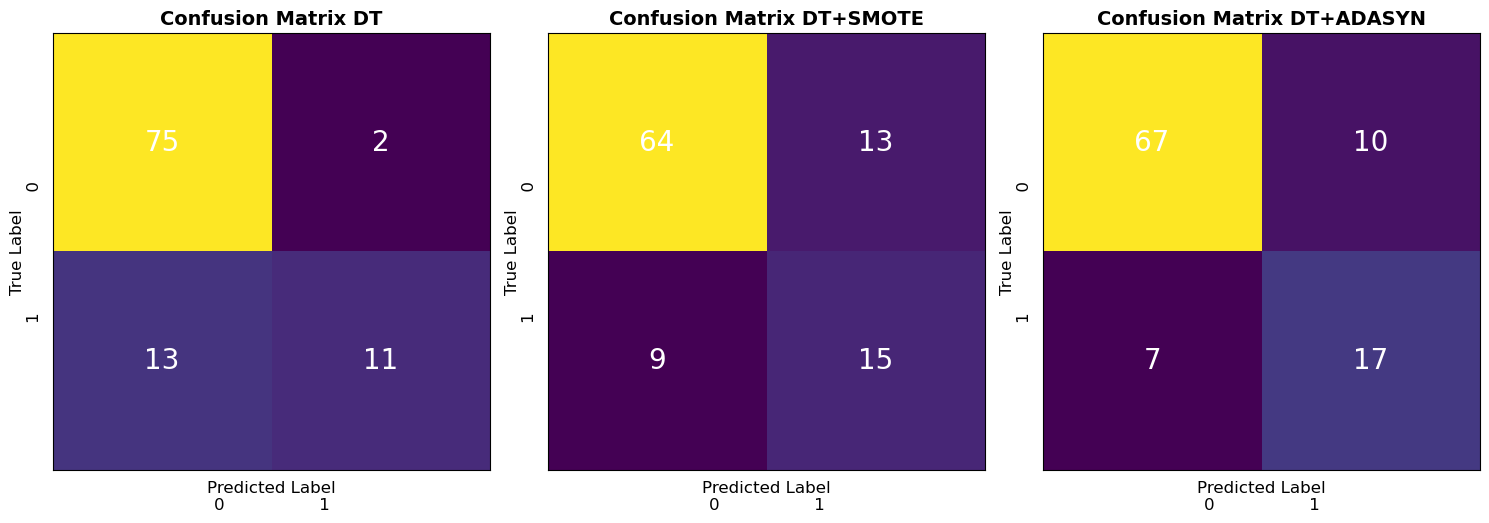

In [107]:
conf_matrices = [cm, cm1, cm2]
dark_palette = 'viridis'

plt.figure(figsize=(15, 5)) 
titles = ["Confusion Matrix DT", "Confusion Matrix DT+SMOTE", "Confusion Matrix DT+ADASYN"]
for i, (conf_matrix, title) in enumerate(zip(conf_matrices, titles), start=1):
    plt.subplot(1, len(conf_matrices), i)
    plt.imshow(conf_matrix, cmap=dark_palette, interpolation='nearest')

    for x in range(conf_matrix.shape[0]):
        for y in range(conf_matrix.shape[1]):
            plt.text(y, x, f'{conf_matrix[x, y]}', ha='center', va='center', color='white', fontsize=20)

    plt.title(title, fontsize=14, fontweight='bold')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.xlabel('Predicted Label\n0                  1', fontsize=12)
    plt.ylabel('True Label\n1                       0', fontsize=12)


plt.tight_layout()  
plt.show()


# XGboost

In [108]:
best_params = {
    'booster': 'dart',
    'lambda': 4.959633438928117e-07,
    'alpha': 3.312347374189632e-08,
    'max_depth': 8,
    'eta': 0.8735933381256857,
    'gamma': 0.0025328078593470174,
    'grow_policy': 'depthwise',
    'subsample': 0.9,
    'colsample_bytree': 0.6
}
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
kappa = cohen_kappa_score(y_test, y_pred)

print("Kappa:", kappa)

Kappa: 0.4781859931113662


In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        77
           1       0.65      0.54      0.59        24

    accuracy                           0.82       101
   macro avg       0.76      0.73      0.74       101
weighted avg       0.81      0.82      0.82       101



In [110]:
conf_matrix = confusion_matrix(y_test, y_pred)

# XGBOOST+SMOTE

In [111]:
smote = SMOTE(random_state=42, k_neighbors=24)
X_resampled_train, y_resampled_train = smote.fit_resample(X_train, y_train)

In [112]:
best_params = {
    'booster': 'gbtree',
    'lambda': 7.818916152525012e-07,
    'alpha': 0.08066430516451725,
    'max_depth': 10,
    'eta': 0.0006862420945796243,
    'gamma': 0.016260819316083686,
    'grow_policy': 'depthwise',
    'subsample': 0.7,
    'colsample_bytree': 0.9,
}

model = xgb.XGBClassifier(**best_params)
model.fit(X_resampled_train, y_resampled_train)
y_pred = model.predict(X_test)

In [113]:
print(classification_report(y_test, y_pred))
kappa = cohen_kappa_score(y_test, y_pred)

print("Kappa:", kappa)


              precision    recall  f1-score   support

           0       0.90      0.82      0.86        77
           1       0.55      0.71      0.62        24

    accuracy                           0.79       101
   macro avg       0.72      0.76      0.74       101
weighted avg       0.82      0.79      0.80       101

Kappa: 0.47848537005163516


In [114]:
conf_matrix1 = confusion_matrix(y_test, y_pred)
true_positives = conf_matrix1[1, 1]
false_negatives = conf_matrix1[1, 0]

sensitivity = true_positives / (true_positives + false_negatives)
print("Sensitivity (True Positive Rate):", sensitivity)

Sensitivity (True Positive Rate): 0.7083333333333334


In [115]:
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc

0.787878787878788

# XGB+ ADASYN

In [116]:
smote = ADASYN(random_state=42, n_neighbors=36, sampling_strategy='minority')
X_resampled_train, y_resampled_train = smote.fit_resample(X_train, y_train)

In [117]:
params = {
    'booster': 'gbtree',
    'lambda': 0.00042790168140966704,
    'alpha': 0.0005206562152570606,
    'max_depth': 9,
    'eta': 0.007541520907127661,
    'gamma': 3.399484892490868e-06,
    'grow_policy': 'depthwise',
    'subsample': 0.7,
    'colsample_bytree': 1.0,
}
model = xgb.XGBClassifier(**params)
model.fit(X_resampled_train, y_resampled_train)
y_pred = model.predict(X_test)

In [118]:
print(classification_report(y_test, y_pred))
kappa = cohen_kappa_score(y_test, y_pred)

print("Kappa:", kappa)

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        77
           1       0.51      0.75      0.61        24

    accuracy                           0.77       101
   macro avg       0.71      0.76      0.72       101
weighted avg       0.82      0.77      0.78       101

Kappa: 0.4571161486328581


In [119]:
conf_matrix2 = confusion_matrix(y_test, y_pred)
true_positives = conf_matrix2[1, 1]
false_negatives = conf_matrix2[1, 0]

sensitivity = true_positives / (true_positives + false_negatives)
print("Sensitivity (True Positive Rate):", sensitivity)

Sensitivity (True Positive Rate): 0.75


In [120]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc

0.7554112554112554

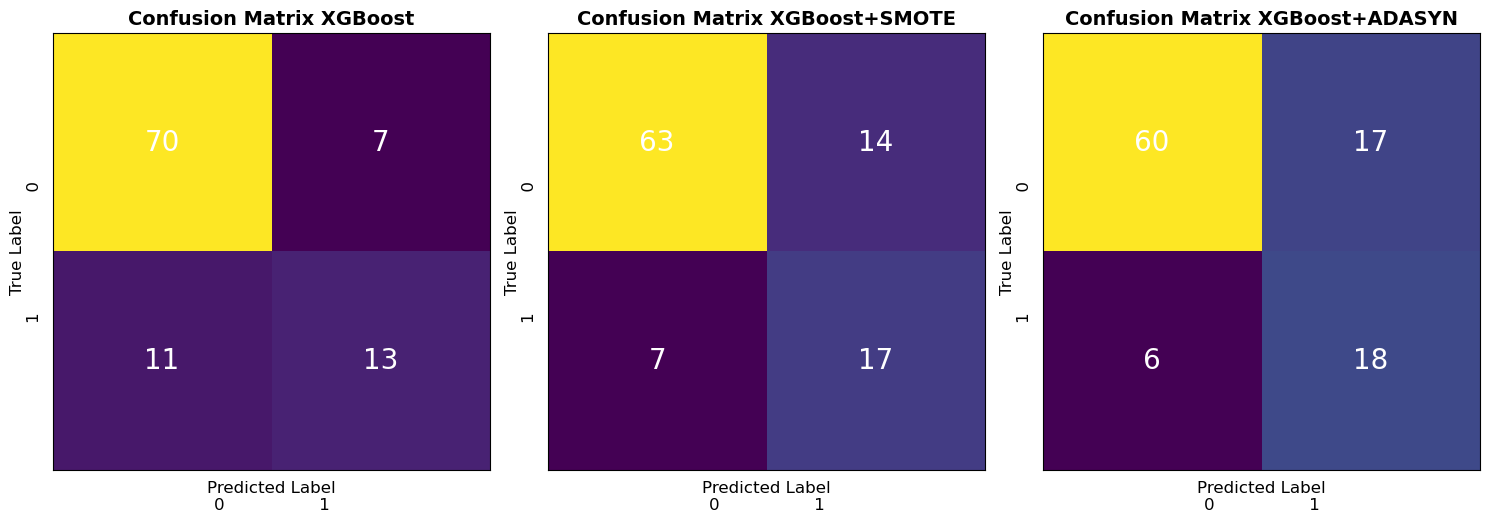

In [121]:
conf_matrices = [conf_matrix,conf_matrix1,conf_matrix2]
dark_palette = 'viridis'

plt.figure(figsize=(15, 5)) 
titles = ["Confusion Matrix XGBoost", "Confusion Matrix XGBoost+SMOTE", "Confusion Matrix XGBoost+ADASYN"]
for i, (conf_matrix, title) in enumerate(zip(conf_matrices, titles), start=1):
    plt.subplot(1, len(conf_matrices), i)
    plt.imshow(conf_matrix, cmap=dark_palette, interpolation='nearest')

    for x in range(conf_matrix.shape[0]):
        for y in range(conf_matrix.shape[1]):
            plt.text(y, x, f'{conf_matrix[x, y]}', ha='center', va='center', color='white', fontsize=20)

    plt.title(title, fontsize=14, fontweight='bold') 
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.xlabel('Predicted Label\n0                  1', fontsize=12)
    plt.ylabel('True Label\n1                       0', fontsize=12)


plt.tight_layout()  
plt.show()


# KNN

In [122]:
knn = KNeighborsClassifier(
    n_neighbors=6,
    weights='distance',  
    algorithm='kd_tree',  
    leaf_size=30,
    p=4, 
)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [123]:
print("Classification Report for the first model:")
print(classification_report(y_test, y_pred))

Classification Report for the first model:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        77
           1       0.67      0.50      0.57        24

    accuracy                           0.82       101
   macro avg       0.76      0.71      0.73       101
weighted avg       0.81      0.82      0.81       101



In [124]:
cm = confusion_matrix(y_test, y_pred)

# KNN+SMOTE

In [125]:
model = KNeighborsClassifier(n_neighbors=29, weights='distance', p=4, leaf_size=19, algorithm='ball_tree')
smote = SMOTE(k_neighbors=12, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
kappa = cohen_kappa_score(y_test, y_pred)

print("Kappa:", kappa)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        77
           1       0.57      0.71      0.63        24

    accuracy                           0.80       101
   macro avg       0.73      0.77      0.75       101
weighted avg       0.82      0.80      0.81       101

Kappa: 0.4967613353263578


In [126]:
y_pred1 = model.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)
true_positives = cm1[1, 1]
false_negatives = cm1[1, 0]

sensitivity = true_positives / (true_positives + false_negatives)
print("Sensitivity (True Positive Rate):", sensitivity)

Sensitivity (True Positive Rate): 0.7083333333333334


In [127]:
y_pred_proba1 = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba1)
roc_auc = auc(fpr, tpr)
roc_auc

0.7867965367965368

# KNN+ADASYN

In [128]:
adasyn = ADASYN(random_state=42, n_neighbors=14, sampling_strategy='minority')
X_resampled_train, y_resampled_train = adasyn.fit_resample(X_train, y_train)

In [129]:
knn = KNeighborsClassifier(
    n_neighbors=8,
    weights='distance', 
    algorithm='brute',  
    leaf_size=53, 
    p=2,  
)
knn.fit(X_resampled_train, y_resampled_train)
y_pred2 = knn.predict(X_test)
print("Classification Report for the first model:")
print(classification_report(y_test, y_pred2))
kappa = cohen_kappa_score(y_test, y_pred2)

print("Kappa:", kappa)

Classification Report for the first model:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        77
           1       0.58      0.75      0.65        24

    accuracy                           0.81       101
   macro avg       0.75      0.79      0.76       101
weighted avg       0.84      0.81      0.82       101

Kappa: 0.5281534300467174


In [130]:
y_pred1 = knn.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred1)
true_positives = cm2[1, 1]
false_negatives = cm2[1, 0]

sensitivity = true_positives / (true_positives + false_negatives)
print("Sensitivity (True Positive Rate):", sensitivity)

Sensitivity (True Positive Rate): 0.75


In [131]:
y_pred_proba1 = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba1)
roc_auc = auc(fpr, tpr)
roc_auc

0.8087121212121213

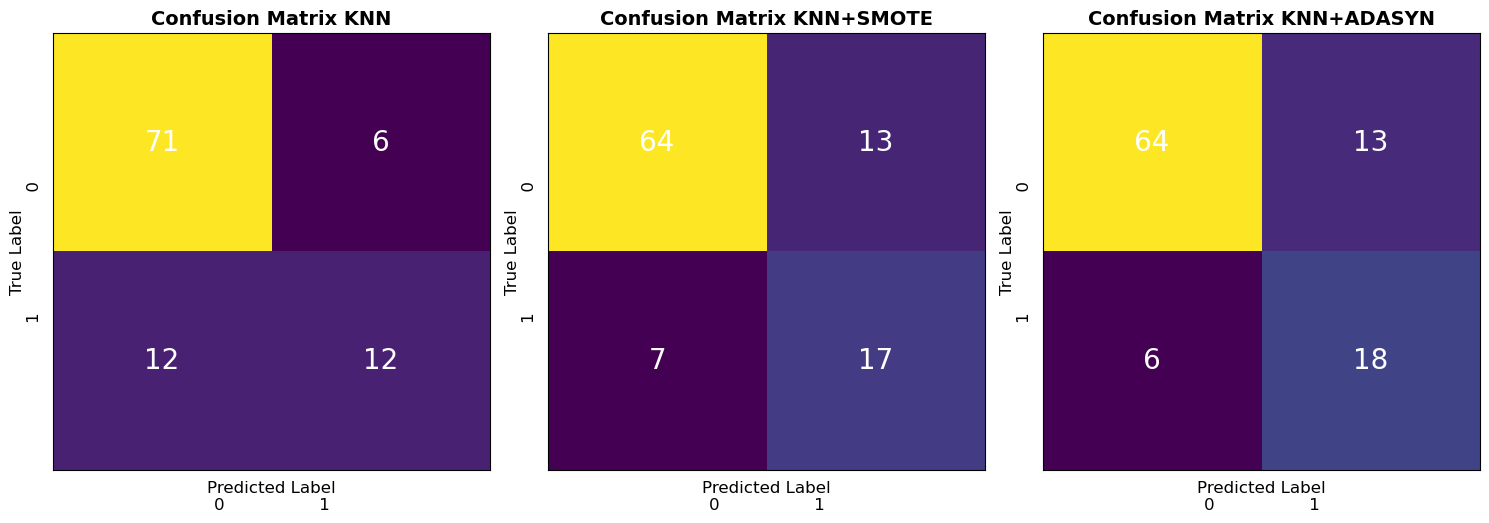

In [133]:
conf_matrices = [cm,cm1,cm2]
dark_palette = 'viridis'

plt.figure(figsize=(15, 5)) 
titles = ["Confusion Matrix KNN", "Confusion Matrix KNN+SMOTE", "Confusion Matrix KNN+ADASYN"]
for i, (conf_matrix, title) in enumerate(zip(conf_matrices, titles), start=1):
    plt.subplot(1, len(conf_matrices), i)
    plt.imshow(conf_matrix, cmap=dark_palette, interpolation='nearest')

    for x in range(conf_matrix.shape[0]):
        for y in range(conf_matrix.shape[1]):
            plt.text(y, x, f'{conf_matrix[x, y]}', ha='center', va='center', color='white', fontsize=20)

    plt.title(title, fontsize=14, fontweight='bold') 
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.xlabel('Predicted Label\n0                  1', fontsize=12)
    plt.ylabel('True Label\n1                       0', fontsize=12)


plt.tight_layout()  
plt.show()
